# Bernstein-Vazirani algorithm

Simple algorithm to prove that quantum computers can outperform classical computers in some tasks. This algorithm has no real life application.

In short, this algorithm tries to "guess" the number inputted by the user. This number is usually a string containing binary information.

## Example

Given the string "1000101", a classical computer would need to perform 7 iterations to "guess" the full string. In each character, the classical computer would need to check if the value equals "1", and act accordingly.

We will see that the quantum version of this algorithm does this in 1 iteration only

## Quantum Circuit

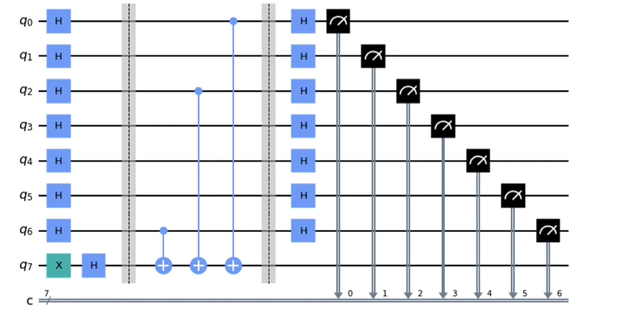

This circuit is for the "1000101" string. A different value would naturally generate a different circuit.

EXPLAIN HOW DOES THIS WORK AFTER

## Implementation

Installs

In [8]:
import sys
!{sys.executable} -m pip install qiskit
!{sys.executable} -m pip install qiskit-aer
!{sys.executable} -m pip install pylatexenc


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\latex2text.exe' -> 'c:\\Python311\\Scripts\\latex2text.exe.deleteme'


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/162.6 kB ? eta -:--:--
     --                                       10.2/162.6 kB ? eta -:--:--
     ------                                30.7/162.6 kB 640.0 kB/s eta 0:00:01
     ------                                30.7/162.6 kB 640.0 kB/s eta 0:00:01
     ------------------                    81.9/162.6 kB 508.4 kB/s eta 0:00:01
     ------------------------             112.6/162.6 kB 595.3 kB/s eta 0:00:01
     -------------------------------      143.4/162.6 kB 532.5 kB/s eta 0:00:01
     ------------------------------------ 162.6/162.6 kB 572.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pylatexenc: filename=p

Imports

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_histogram

Define the secret number and its length

In [2]:
secretNumber = "1000101"
numberLength = len(secretNumber)

Initiate the circuit

In [7]:
circuit = QuantumCircuit(numberLength + 1, numberLength)

Apply the gates

In [4]:
circuit.h(range(numberLength)) # Apply Hadamard to all qubits except Ancilla
circuit.x(numberLength) # Apply NOT to Ancilla   
circuit.h(numberLength) # Apply Hadamard to Ancilla

# Loop through all chars in the string and put a CNOT gate in all the ones that contain "1"
for index, one in enumerate(reversed(secretNumber)): # First qubit equals the last char in the string so we need to reverse the list
    if one == "1":
        circuit.cx(index, numberLength) # Apply CNOT between selected qubit and Ancilla

circuit.h(numberLength) # Apply Hadamard to all qubits except Ancilla

circuit.measure(range(numberLength), range(numberLength)) # Measure


Now let's draw the circuit

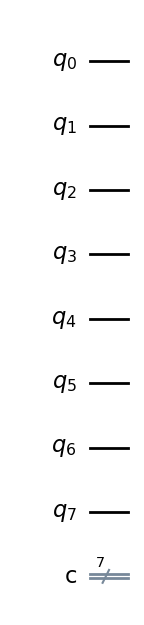

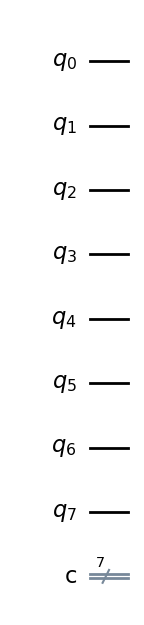

In [8]:
circuit.draw(output="mpl")